# Just an example.You can alter sample code anywhere. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import model

In [2]:
#Fix the random seed
np.random.seed(0)

## Load the training data and label

In [3]:
def in_and_norm(infile):
    data = pd.read_csv(infile, header=None)
    data = np.array(data.values.tolist())

    data_mean = np.mean(data, axis = 1)
    data_std  = np.std(data, ddof = 1, axis = 1)

    data_mean = np.repeat(data_mean, data.shape[1]).reshape(data.shape[0], -1) 
    data_std  = np.repeat(data_std, data.shape[1]).reshape(data.shape[0], -1)
    
    out = (data - data_mean) / data_std

    data = (out / 2) + 0.5
    return data

train_label = pd.read_csv('./data/train_label.csv',header=None)
train_label = train_label.values.tolist()
train_label = np.array(train_label)
train_label = train_label.flatten()

train_data = in_and_norm('./data/train_data.csv')
test_data = in_and_norm('./data/test_data.csv')


print("shape of train_data: {}".format(train_data.shape))
print("shape of train_label: {}".format(train_label.shape))
print("shape of test_data: {}".format(test_data.shape))

shape of train_data: (11500, 4096)
shape of train_label: (11500,)
shape of test_data: (1500, 4096)


## Show the training data

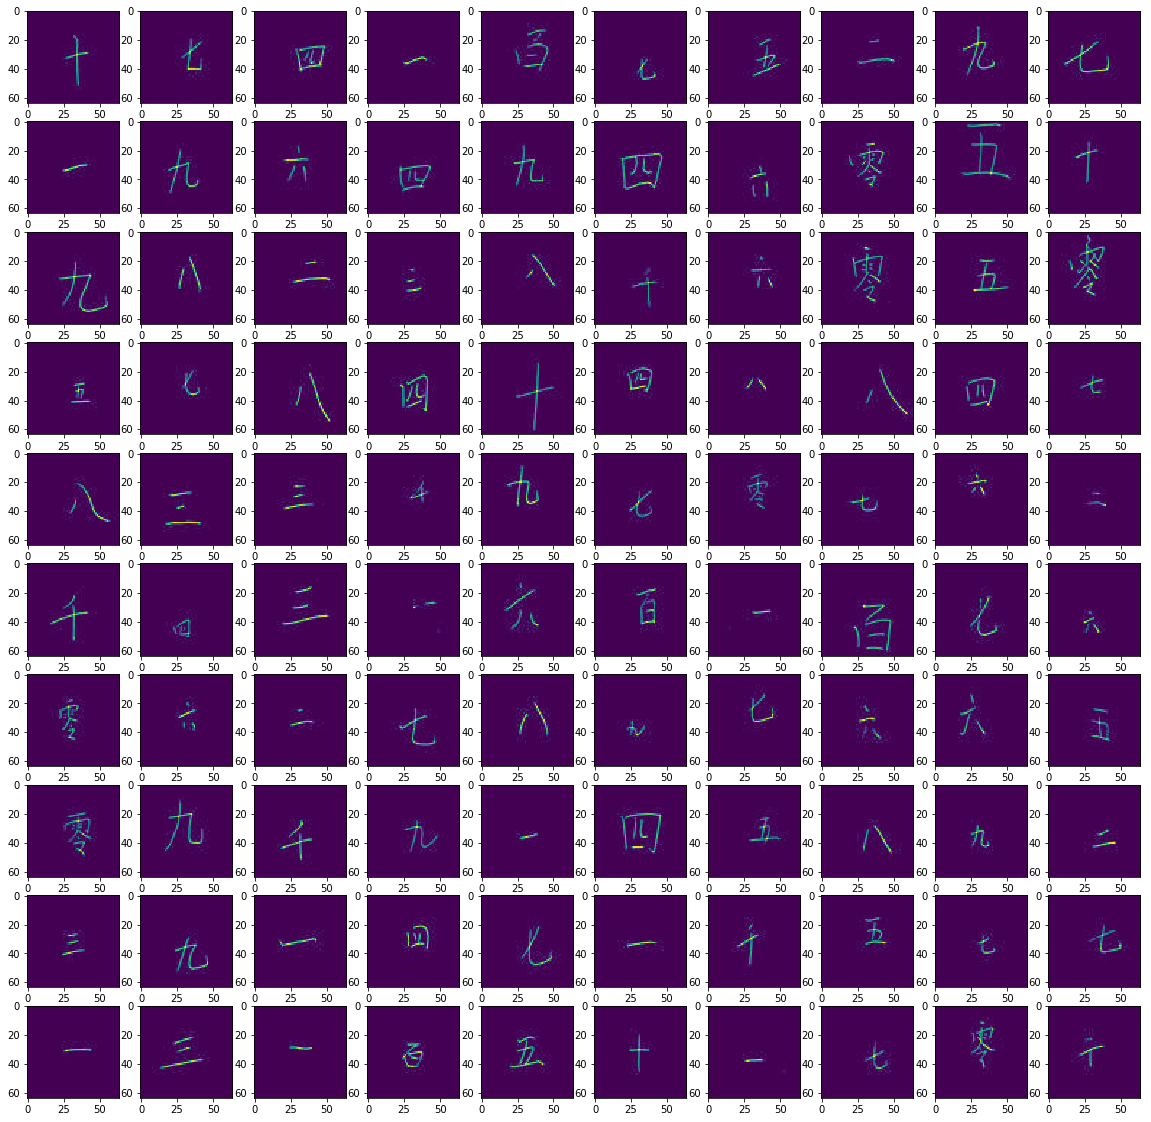

In [4]:
plt.figure(figsize=(20, 20))
for index in range(100):
    image = train_data[index].reshape(64,64)
    plt.subplot(10, 10, index+1)
    plt.imshow(image)
plt.show()

In [6]:
train_image_num = train_data.shape[0]
test_image_num = test_data.shape[0]

print("shape of train_data: {}".format(train_data.shape))
print("shape of train_label: {}".format(train_label.shape))
print("shape of test_data: {}".format(test_data.shape))


print("train_image_num  is : {}".format(train_image_num))
print("test_image_num   is : {}".format(test_image_num))

shape of train_data: (11500, 4096)
shape of train_label: (11500,)
shape of test_data: (1500, 4096)
train_image_num  is : 11500
test_image_num   is : 1500


In [7]:
val_image_num=1500

## Convert the training labels to one hot vector

In [8]:
label_temp = np.zeros((train_image_num, 13), dtype = np.float32)
for i in range(train_image_num):
    label_temp[i][train_label[i]] = 1
train_label_onehot = np.copy(label_temp)
print("One-hot training labels shape:",train_label_onehot.shape)





One-hot training labels shape: (11500, 13)


## Hyperparameters

In [10]:
EPOCH = 20
Batch_size = 125
Learning_rate = 1e-3


## Training

In [15]:
net = model.Network()

train_batch_num = (train_image_num  -  val_image_num  )//Batch_size
val_batch_num = (val_image_num)//Batch_size
# test_batch_num = test_image_num//Batch_size

for epoch in range(1, EPOCH+1):
    train_hit = 0
    val_hit = 0
    total_train_loss = 0
    total_val_loss = 0
    for it in range(train_batch_num):
        pred, train_loss = net.forward(train_data[it*Batch_size:(it+1)*Batch_size], train_label_onehot[it*Batch_size:(it+1)*Batch_size])
        pred_index = np.argmax(pred, axis=1)
        train_hit += (pred_index==train_label[it*Batch_size:(it+1)*Batch_size]).sum()
        total_train_loss += train_loss
        
        net.backward()
        net.update(Learning_rate)
        
    for titt in range(val_batch_num):
        tit=train_batch_num+titt
        pred, val_loss = net.forward(train_data[tit*Batch_size:(tit+1)*Batch_size], train_label_onehot[tit*Batch_size:(tit+1)*Batch_size])
        pred_index = np.argmax(pred, axis=1)
        val_hit += (pred_index==train_label[tit*Batch_size:(tit+1)*Batch_size]).sum()
        total_val_loss += val_loss
        
    print('Epoch:%3d'%epoch, '|Train Loss:%8.4f'%(total_train_loss/train_batch_num), '|Train Acc:%3.4f'%(train_hit/(train_image_num-val_image_num)*100.0)
          , '|Val Loss:%8.4f'%(total_val_loss/val_batch_num), '|Val Acc:%3.4f'%(val_hit/val_image_num*100.0))

Epoch:  1 |Train Loss:  1.4883 |Train Acc:49.7200 |Val Loss:  0.8185 |Val Acc:69.9333
Epoch:  2 |Train Loss:  0.5583 |Train Acc:80.3900 |Val Loss:  0.4845 |Val Acc:80.8667
Epoch:  4 |Train Loss:  0.2119 |Train Acc:92.4600 |Val Loss:  0.3757 |Val Acc:87.1333
Epoch:  5 |Train Loss:  0.1333 |Train Acc:95.3500 |Val Loss:  0.3149 |Val Acc:89.6000
Epoch:  6 |Train Loss:  0.1081 |Train Acc:96.3500 |Val Loss:  0.2982 |Val Acc:90.6000
Epoch:  7 |Train Loss:  0.0762 |Train Acc:97.4400 |Val Loss:  0.2456 |Val Acc:92.2667
Epoch:  8 |Train Loss:  0.0711 |Train Acc:97.6800 |Val Loss:  0.2448 |Val Acc:92.1333
Epoch:  9 |Train Loss:  0.0447 |Train Acc:98.6300 |Val Loss:  0.1993 |Val Acc:94.3333
Epoch: 10 |Train Loss:  0.0521 |Train Acc:98.4300 |Val Loss:  0.2494 |Val Acc:92.3333


## Dump for evaluation (upload your DLAD-test-predict.csv to kaggle )

In [16]:
test_pred_list = []

for tit in range(test_image_num//Batch_size):
    pred, test_loss = net.forward(test_data[tit*Batch_size:(tit+1)*Batch_size], train_label_onehot[tit*Batch_size:(tit+1)*Batch_size])
    pred_index = np.argmax(pred, axis=1)
    test_pred_list += pred_index.tolist()
    

print('Dump file...')
df = pd.DataFrame(test_pred_list, columns=["Category"])
df.to_csv('DLAD-test-predict.csv', index=True, index_label="Id")

Dump file...
